In [4]:
import math
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from google.colab import files
uploaded = files.upload()

Saving train_data.csv to train_data (2).csv


In [8]:
df = pd.read_csv('train_data.csv')
X = df.drop(columns=['diagnosis']).to_numpy().T
y = df['diagnosis'].to_numpy().reshape(-1, 1).T

print(y)
print(y.shape)
print(X)
print(X.shape)

[[1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 0
  0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0
  1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0
  1 1 1 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 1 1 0
  1 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1
  1 0 0 1 1 0 0 1 0 1 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0
  0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1
  1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0
  1 1 1 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 0 0 0 1 0
  0 0 1 0 0 1 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0
  0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 1 1 0 0 1 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1
  0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0
  0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1]]
(1, 455)
[[ 0.51855873 -0.51636409 -0.36811839 ... -0.32616206

In [9]:
def sigmoid(z, derivative=False):
    if derivative:
        return z * (1 - z)
    return 1 / (1 + np.exp(-z))

In [10]:
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=0, keepdims=True))
    return exp_z / np.sum(exp_z, axis=0, keepdims=True)

In [11]:
def network_archi(X, y):
    n_input = X.shape[0]
    n_output = y.shape[0]
    n_hidden1 = math.ceil((n_input + n_output) / 2)
    n_hidden2 = math.ceil((n_input + n_output) / 4)
    return n_input, n_hidden1, n_hidden2, n_output

print(network_archi(X, y))

(30, 16, 8, 1)


In [14]:
def define_model(X, y):
    n_input, n_hidden1, n_hidden2, n_output = network_archi(X, y)

    W1 = np.random.randn(n_hidden1, n_input) * 0.01
    b1 = np.zeros((n_hidden1, 1))
    W2 = np.random.randn(n_hidden2, n_hidden1) * 0.01
    b2 = np.zeros((n_hidden2, 1))
    W3 = np.random.randn(n_output, n_hidden2) * 0.01
    b3 = np.zeros((n_output, 1))

    parameters = {'W1': W1, 'b1': b1,
                  'W2': W2, 'b2': b2,
                  'W3': W3, 'b3': b3}
    return parameters

params = define_model(X, y)
print(params)


{'W1': array([[-1.09304366e-02, -1.71508632e-02, -6.13210863e-03,
         1.24590717e-02,  1.18866003e-02, -1.54674250e-03,
        -1.18103803e-02, -1.47340522e-02,  7.82386230e-03,
         8.97605052e-03, -4.87220046e-03, -3.22820794e-03,
         1.38437460e-02,  2.05277987e-02,  1.76683695e-02,
         7.44669830e-03, -1.62135425e-02,  1.77159020e-02,
         9.14125114e-03,  7.44097908e-03, -4.93205600e-04,
        -9.41224280e-03, -2.02614530e-03, -7.20195258e-03,
        -3.14880991e-03,  4.02223915e-03, -2.24765275e-02,
         2.07087496e-02, -8.52641320e-06,  1.77376507e-03],
       [-2.33120368e-03,  1.26565885e-02,  7.72846363e-03,
         2.65539285e-03, -8.38439778e-03,  5.21713590e-03,
         2.36703469e-02,  1.17042737e-02,  9.33691072e-03,
         9.42279103e-03,  3.14748163e-03, -9.56525770e-03,
         1.45961835e-03,  4.84457366e-03, -3.01289700e-03,
         1.08056677e-02, -5.93629674e-03,  1.29311587e-02,
         1.74284476e-02,  1.48582646e-02, -1.067

In [17]:
def forward_propagation(X, parameters):
    W1, b1 = parameters['W1'], parameters['b1']
    W2, b2 = parameters['W2'], parameters['b2']
    W3, b3 = parameters['W3'], parameters['b3']

    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1) #1 / (1 + np.exp(-z1))
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2) #1 / (1 + np.exp(-z2))
    Z3 = np.dot(W3, A2) + b3
    A3 = sigmoid(Z3) #1 / (1 + np.exp(-z3))

    cache = {'Z1': Z1, 'A1': A1,
             'Z2': Z2, 'A2': A2,
             'Z3': Z3, 'A3': A3}
    shape = {'Z1': Z1.shape, 'A1': A1.shape,
             'Z2': Z2.shape, 'A2': A2.shape,
             'Z3': Z3.shape, 'A3': A3.shape}
    return cache, shape

In [24]:
cache, shapes = forward_propagation(X, params)
print(shapes)

def backward_propagation(X, y, parameters, cache):
    m = X.shape[1]
    n = X.shape[0]
    W1, b1 = parameters['W1'], parameters['b1']
    W2, b2 = parameters['W2'], parameters['b2']
    W3, b3 = parameters['W3'], parameters['b3']

    A1, A2, A3 = cache['A1'], cache['A2'], cache['A3']

    dZ3 = A3 - y
    dW3 = (1/m) * np.dot(dZ3, A2.T)
    db3 = (1/m) * np.sum(dZ3, axis=1, keepdims=True)

    dZ2 = np.dot(W3.T, dZ3) * sigmoid(A2, derivative=True)
    dW2 = (1/m) * np.dot(dZ2, A1.T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)

    dZ1 = np.dot(W2.T, dZ2) * sigmoid(A1, derivative=True)
    dW1 = (1/m) * np.dot(dZ1, X.T)
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)


    grads = {'dW3': dW3, 'db3': db3,
             'dW2': dW2, 'db2': db2,
             'dW1': dW1, 'db1': db1}
    return grads

def update_parameters(parameters, derivatives, learning_rate):
    W1, b1 = parameters['W1'], parameters['b1']
    W2, b2 = parameters['W2'], parameters['b2']
    W3, b3 = parameters['W3'], parameters['b3']

    dW1, db1 = derivatives['dW1'], derivatives['db1']
    dW2, db2 = derivatives['dW2'], derivatives['db2']
    dW3, db3 = derivatives['dW3'], derivatives['db3']

    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W3 = W3 - learning_rate * dW3
    b3 = b3 - learning_rate * db3

    parameters = {'W1': W1, 'b1': b1,
                  'W2': W2, 'b2': b2,
                  'W3': W3, 'b3': b3}
    return parameters

{'Z1': (16, 455), 'A1': (16, 455), 'Z2': (8, 455), 'A2': (8, 455), 'Z3': (1, 455), 'A3': (1, 455)}


In [29]:
#calucler le model et update les parametrs
derivatives = backward_propagation(X, y, params, cache)
update = update_parameters(params, derivatives, 0.1)

In [30]:
def compute_error(pred, actual):
    return np.mean((pred - actual) ** 2)

In [31]:
def mlp(X, y, epochs=100):
  #init params
  input, n_h1, n_h2, output = network_archi(X, y)
  params = define_model(X, y)
  cost_history = []

  for i in range(epochs):
    #forward
    cache, shapes = forward_propagation(X, params)
    #error
    cost = compute_error(cache['A3'], y)
    cost_history.append(cost)
    #backward
    derivatives = backward_propagation(X, y, params, cache)
    #update
    params = update_parameters(params, derivatives, 0.01)

  return params, cost_history

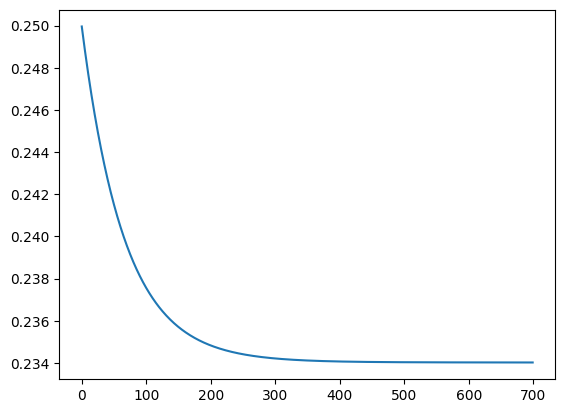

In [38]:
model, cost = mlp(X, y, 700)
plt.plot(cost)
plt.show()